In [2]:
import pandas as pd

file_path = '/mnt/c/Users/atrivedi/Downloads/archive/MBA.csv'
df = pd.read_csv(file_path) # Read csv into pandas dataframe
df['admission'] = df['admission'].fillna(0)  # Assume NaN means 'Rejected' and fill with 0
df['race'] = df['race'].fillna('Unknown')  # Fill missing race with 'Unknown'

print(df.head(50))

    application_id  gender  international   gpa       major      race   gmat  \
0                1  Female          False  3.30    Business     Asian  620.0   
1                2    Male          False  3.28  Humanities     Black  680.0   
2                3  Female           True  3.30    Business   Unknown  710.0   
3                4    Male          False  3.47        STEM     Black  690.0   
4                5    Male          False  3.35        STEM  Hispanic  590.0   
5                6    Male          False  3.18    Business     White  610.0   
6                7  Female          False  2.93        STEM     Other  590.0   
7                8    Male           True  3.02    Business   Unknown  630.0   
8                9    Male          False  3.24    Business     White  590.0   
9               10    Male          False  3.27  Humanities     Asian  690.0   
10              11    Male          False  3.05  Humanities     White  580.0   
11              12    Male           Tru

In [94]:
# Import necessary libraries and modules

import pandas as pd # Import pandas library to load kaggle data into a pandas dataframe
import torch # Import pytorch for building and training the model
import torch.nn as nn # Import neural network module from PyTorch
import torch.optim as optimizer # Import optimization algorithms from Pytorch for backward pass
from sklearn.model_selection import train_test_split # Import test-train split feature
from sklearn.preprocessing import StandardScaler # Import feature scaling feature
from sklearn.metrics import accuracy_score, precision_score, recall_score # Import metrics
import matplotlib.pyplot as plt # Import matplotlib for graphing
import numpy as np

# Step 1: Load and Preprocess the data

# Load the dataset
file_path = '/mnt/c/Users/atrivedi/Downloads/archive/MBA.csv' # Local file path to dataset
df = pd.read_csv(file_path) # Read csv into pandas dataframe
df['admission'] = df['admission'].fillna(0)  # Assume NaN means 'Rejected' and fill with 0
df['race'] = df['race'].fillna('Unknown')  # Fill missing race with 'Unknown'


# Preprocess the dataset
df = pd.get_dummies(df, columns=['gender', 'international','race','major', 'work_industry'], drop_first=True) # Convert categorical (strings) variables into dummy (binary) variables so the neural net can work with it, not admission though
df['admission'] = df['admission'].apply(lambda x: 1 if x == 'Admit' else 0) # Convert 'Admit' to 1 and others to 0 for binary classification
X = df.drop('admission', axis=1) # Drop the admission column, so the features and the outputs aren't paired together
y = df['admission'] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Split the data into training and test sets --> 80-20 split
scaler = StandardScaler() # Create an instance of the StandardScaler class to scale our values
X_train = scaler.fit_transform(X_train) # Scale the training data
X_test = scaler.fit_transform(X_test) # Scale the testing data
X_train_tensor = torch.FloatTensor(X_train)  # Convert training features to PyTorch tensor
X_test_tensor = torch.FloatTensor(X_test)  # Convert test features to PyTorch tensor
y_train_tensor = torch.LongTensor(y_train.values)  # Convert training labels to LongTensor (for classification)
y_test_tensor = torch.LongTensor(y_test.values)  # Convert test labels to LongTensor

# Define MLP Model
class MLP(nn.Module): # Define a class for the MLP model, inheriting from the nn.Module framework
    def __init__(self, input_size): # Initialize the model with the input size
        super(MLP, self).__init__() # Allows MLP class to initialize any properties defined in nn.Module
        self.fc1 = nn.Linear(input_size, 128) # First layer with input size (based on columns of the df) and 256 neurons (output)
        self.fc2 = nn.Linear(128, 64) # Second layer with 256 input neurons and 128 output neurons
        self.fc3 = nn.Linear(64, 2)  # Output layer
        self.relu = nn.ReLU() # Initializes the ReLU activaton function to introduce non-linearity into the model
        self.dropout = nn.Dropout(p=0.5) # Add dropout
    def forward(self, x): # Define the forward pass 
        x = self.relu(self.fc1(x)) # Apply the first layer and ReLU activation
        x = self.dropout(x)
        x = self.relu(self.fc2(x)) # Apply the second layer and ReLU activation
        x = self.dropout(x)
        x = self.fc3(x) # Pass through the output layer
        return x # Return the final output

# Step 3: Instantiate the model

input_size = X_train.shape[1] # Get the number of input features (columns of the df)
model = MLP(input_size) # Create an instance of the MLP model

# Step 4: Set up the loss function and optimizer

criterion = nn.CrossEntropyLoss() # Define the loss function
optimizer = optimizer.Adam(model.parameters(), lr=0.0001)  # Set up the Adam optimizer with a learning rate of 0.001 (this is useful for the backward pass)

# Step 5: Train the model
num_epochs = 1000 # Determine how many epochs of the model we want
train_losses = [] # List to store training losses
test_losses = [] # List to store testing losses
predicted_labels = []
for epoch in range(num_epochs): # Loop over each epoch
    model.train # set the model to training mode
    optimizer.zero_grad()  # Clear gradients from the previous step
    outputs = model(X_train_tensor)  # Perform a forward pass to get model predictions
    loss = criterion(outputs, y_train_tensor)  # Compute the loss using the predictions and true labels
    loss.backward()  # Backpropagate the loss to compute gradients
    optimizer.step()  # Update model parameters based on computed gradients

    # Store training loss
    train_losses.append(loss.item())

    # Evaluate the model
    model.eval() # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient calculation for evaluation
        test_outputs = model(X_test_tensor)  # Forward pass on test data
        test_loss = criterion(test_outputs, y_test_tensor)  # Compute test loss
        test_losses.append(test_loss.item())  # Store test loss

        # Get predicted labels (choose class with highest score)
        _, predicted = torch.max(test_outputs, 1)




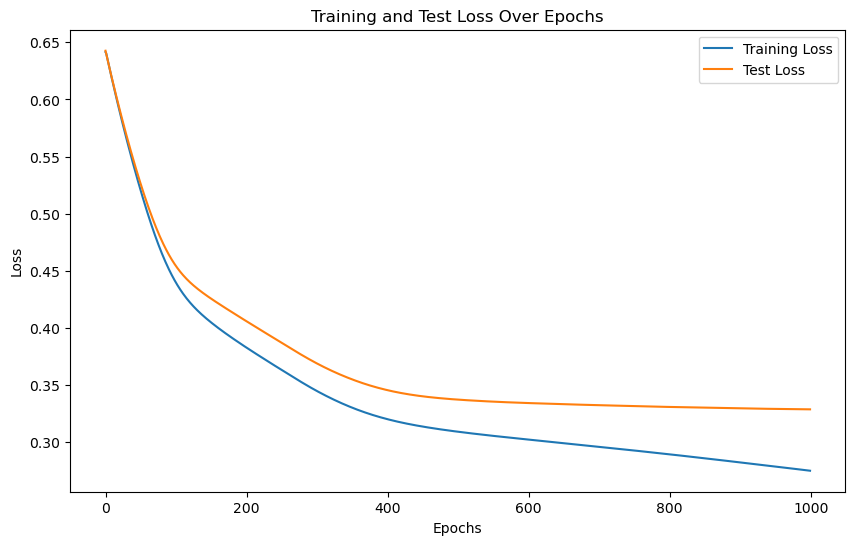

In [95]:
# Step 6: Plot the losses
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.show()

Accuracy: 0.8467
Precision: 0.5395
Recall: 0.2092


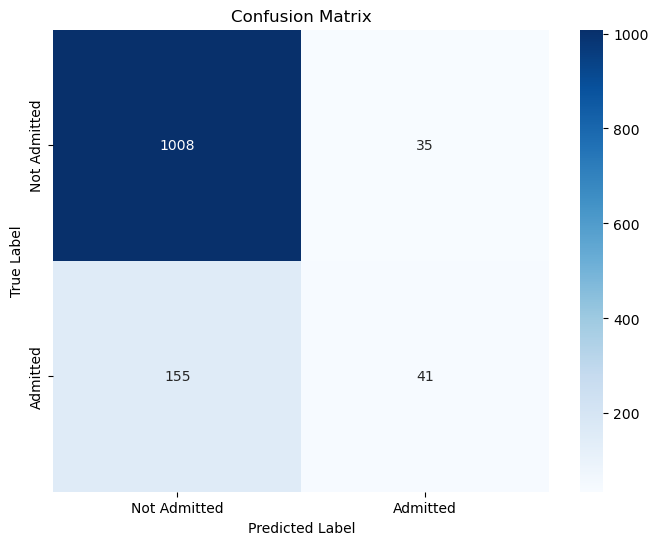

In [96]:
# Import necessary libraries for metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns 

# After training your model, generate predictions
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    test_outputs = model(X_test_tensor)  # Forward pass on test data
    _, y_pred = torch.max(test_outputs, 1)  # Get the predicted class labels

# Convert tensors to numpy arrays for scikit-learn
y_test_np = y_test_tensor.numpy()  # True labels
y_pred_np = y_pred.numpy()  # Predicted labels

# Step 1: Create the confusion matrix
cm = confusion_matrix(y_test_np, y_pred_np)

# Step 2: Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test_np, y_pred_np)
precision = precision_score(y_test_np, y_pred_np)
recall = recall_score(y_test_np, y_pred_np)

# Print metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

# Step 3: Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Admitted', 'Admitted'], yticklabels=['Not Admitted', 'Admitted'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



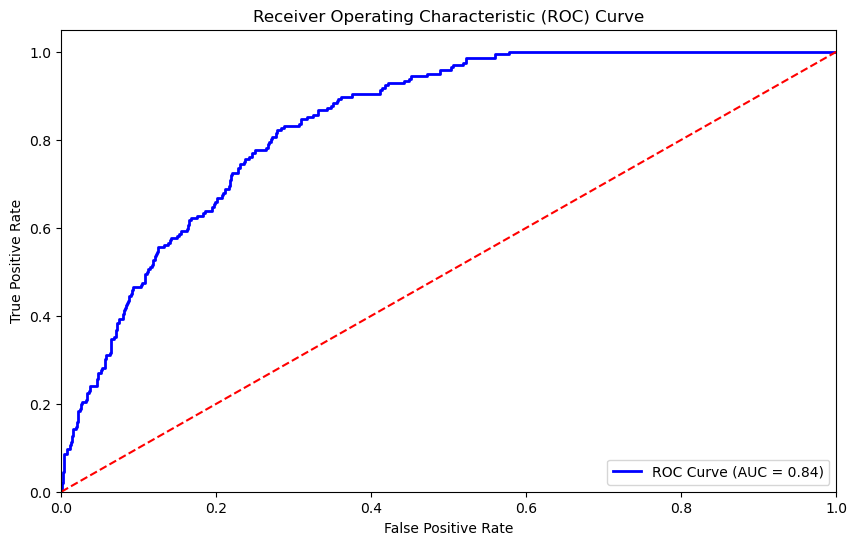

In [97]:
from sklearn.metrics import roc_curve, auc
with torch.no_grad():
    test_outputs = model(X_test_tensor)  # Forward pass on test data
    probabilities = nn.Softmax(dim=1)(test_outputs)[:, 1]  # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, probabilities)  # y_test should be the actual labels
roc_auc = auc(fpr, tpr)  # Calculate the AUC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#Therefore, an AUC of 0.81 means that the model is able to correctly distinguish between positive and negative classes 81% of the time based on the area under the ROC curve. A value of 0.81 indicates that the model has a relatively strong ability to identify true positive cases while minimizing false positives.

